In [1]:
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np

plt.rcParams.update({'font.size': 33})

matplotlib.rc('xtick', labelsize=27)
matplotlib.rc('ytick', labelsize=27)

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os

#Setting private spotify client info 
os.environ['SPOTIPY_CLIENT_ID']= #string 
os.environ['SPOTIPY_CLIENT_SECRET']= #string 
os.environ['SPOTIPY_REDIRECT_URI']='http://example.com'

In [3]:
#Grabbing artist info for The Mountain Goats
#The specific artist ID can be found in the url of the artists home page 

artist_url = 'spotify:artist:3hyGGjxu73JuzBa757H6R5'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

#Grab individual artist profile 
artist = spotify.artist(artist_url)
print('Artist Popularity: %i'%artist['popularity'])
print('')

#Grab related artists 
results = spotify.artist_related_artists(artist_url)
artists = results['artists']


print('Related Artists:')
for artist in artists:
    print(artist['name'])


Artist Popularity: 55

Related Artists:
Okkervil River
Neutral Milk Hotel
Nana Grizol
The Decemberists
Jeffrey Lewis
The Weakerthans
The Magnetic Fields
The Thermals
The Hold Steady
The Unicorns
Bright Eyes
The Microphones
Mount Eerie
The New Pornographers
Built To Spill
Kimya Dawson
of Montreal
AJJ
Titus Andronicus
Defiance, Ohio


In [4]:
#Getting my own spotify profile 
from spotipy.oauth2 import SpotifyOAuth

scope = "user-library-read user-top-read"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope))

In [5]:
#Get user top 50 artists 
my_data = sp.current_user_top_artists(50)

In [6]:
#Grabbing information from top 50 artists: name, popularity, # of followers 

popularity = []
followers = []
name = []


for artist in my_data['items']:
    name.append(artist["name"])
    followers.append(artist["followers"]['total'])
    popularity.append(artist["popularity"])
followers = np.array(followers)


Text(0, 0.5, 'My Ranking -->')

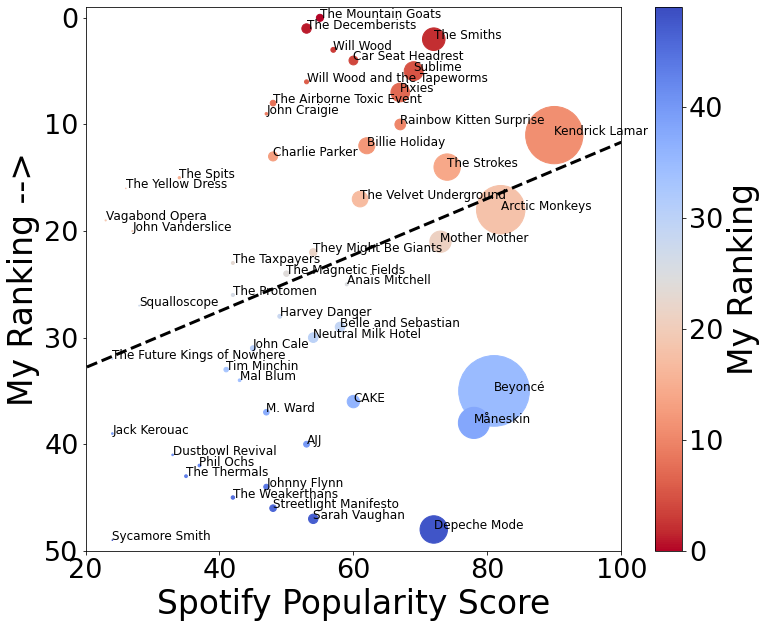

In [7]:
#Scatter plot of my ranking vs artist popularity 
#size set by # of followers, color set by where they rank on my list 
#dashed line is a simple linear regression 

plt.figure(figsize=(12,10))
plt.scatter(popularity, np.arange(50), s= (followers)/np.max((followers))*5000, c = np.arange(50), cmap='coolwarm_r')
plt.gca().invert_yaxis()
for i in range(len(popularity)): plt.text(popularity[i], i, name[i], fontsize=12)
plt.xlim([20,100])
plt.ylim([50,-1])
p = np.polyfit(popularity, np.arange(50), deg=1)
x = np.linspace(0,100,10)
plt.plot(x, p[0]*x+p[1], c = 'k', linestyle='--', linewidth=3)
plt.colorbar(label='My Ranking')
plt.xlabel('Spotify Popularity Score')
plt.ylabel('My Ranking -->')

In [8]:
#Generating data frame to store playlist information
import pandas as pd 

columns = ['decade', 'text']
df = pd.DataFrame(columns=columns)

In [9]:
from english_words import english_words_set

In [10]:
#Grab specific playlist, also available from spotify playlist page 

#playlist_url = 'spotify:playlist:37i9dQZF1DXbTxeAdrVG2l' all out 90s 
playlist_url = 'spotify:playlist:37i9dQZF1DX4o1oenSJRJd' #all out 00s
#playlist_url = 'spotify:playlist:37i9dQZF1DXaW8fzPh9b08' #hits out 2003s

In [11]:
playlist_tracks = spotify.playlist_tracks(playlist_url)
playlist_tracks = playlist_tracks['items']

In [12]:
#get track names and artist names for Genius 
track_names = []
track_artists = []
for track in playlist_tracks:
    track_names.append(track['track']['name'])
    track_artists.append(track['track']['artists'][0]['name'])



In [13]:
#Import Genius package, this also needs a token 

from lyricsgenius import Genius
import re
import ast
token='yccUhR9cl_LI-0b1FjuMVBGuScpwt9xpkyh1VCWM_9cNmMPN38PFm2Ephw0I2WmB'
genius = Genius(token)
lyrics_all = []

#Get lyrics for each track and do some clean, check in English words dictionary 
for i in range(len(track_names)):
    try:
        song = genius.search_song(track_names[i],track_artists[i])
        lyrics = re.sub(r'[\(\[].*?[\)\]]', '', song.lyrics)
        lyrics = re.sub(r'\n', ' ', lyrics)


        
        lyrics = os.linesep.join([s for s in lyrics.splitlines() if s]).split(" ") 
        
        
        lyrics_all.extend(lyrics)
        
        lyrics_clean = []

        for word in (lyrics):
            if(word.lower() in english_words_set): 
                lyrics_clean.append(word)
                    
        df.loc[len(df.index)] = ['00', (' '.join(lyrics_clean))] 


    except: 
        print(track_names[i])
    


Searching for "Umbrella" by Rihanna...
Done.
Searching for "In Da Club" by 50 Cent...
Done.
Searching for "Just Dance" by Lady Gaga...
Done.
Searching for "The Sweet Escape" by Gwen Stefani...
Done.
Searching for "Hips Don't Lie (feat. Wyclef Jean)" by Shakira...
Done.
Searching for "Yeah!" by Usher...
Done.
Searching for "Family Affair" by Mary J. Blige...
Done.
Searching for "Lose Yourself - From "8 Mile" Soundtrack" by Eminem...
Done.
Searching for "Don't Stop The Music" by Rihanna...
Done.
Searching for "Empire State Of Mind" by JAY-Z...
Done.
Searching for "A-Punk" by Vampire Weekend...
Done.
Searching for "Last Nite" by The Strokes...
Done.
Searching for "Take Me Out" by Franz Ferdinand...
Done.
Searching for "When The Sun Goes Down" by Arctic Monkeys...
Done.
Searching for "No One Knows" by Queens of the Stone Age...
Done.
Searching for "When You Were Young" by The Killers...
Done.
Searching for "Young Folks" by Peter Bjorn and John...
Done.
Searching for "Cosmic Love" by Floren

In [14]:
#Grab a playlist for comparison 

#playlist_url = 'spotify:playlist:37i9dQZF1DWSV3Tk4GO2fq' #all out 50s 
#playlist_url = 'spotify:playlist:37i9dQZF1DXaKIA8E7WcJj' #all out 60s 
playlist_url = 'spotify:playlist:37i9dQZF1DWTJ7xPn4vNaz'  #all out 70s 
#playlist_url = 'spotify:playlist:37i9dQZF1DWXQyLTHGuTIz'  #hits of 70s 



In [15]:
playlist_tracks = spotify.playlist_tracks(playlist_url)
playlist_tracks = playlist_tracks['items']
track_names = []
track_artists = []
for track in playlist_tracks:
    track_names.append(track['track']['name'])
    track_artists.append(track['track']['artists'][0]['name'])


In [16]:
lyrics_all_50s = []
for i in range(len(track_names)):
    try:
        song = genius.search_song(track_names[i],track_artists[i])
        lyrics = re.sub(r'[\(\[].*?[\)\]]', '', song.lyrics)
        lyrics = re.sub(r'\n', ' ', lyrics)

        
        lyrics = os.linesep.join([s for s in lyrics.splitlines() if s]).split(" ") 
        
        
        lyrics_all_50s.extend(lyrics)
        
        lyrics_clean = []

        for word in (lyrics):
            if(word.lower() in english_words_set): 
                lyrics_clean.append(word)
                    
        df.loc[len(df.index)] = ['70', (' '.join(lyrics_clean))] 

    except: 
        print(track_names[i])
    

Searching for "Rocket Man (I Think It's Going To Be A Long, Long Time)" by Elton John...
Done.
Searching for "Wild World" by Yusuf / Cat Stevens...
Done.
Searching for "Easy" by Commodores...
Done.
Searching for "Hotel California - 2013 Remaster" by Eagles...
Done.
Searching for "Paradise By the Dashboard Light" by Meat Loaf...
Done.
Searching for "How Deep Is Your Love" by Bee Gees...
Done.
Searching for "You Are The Sunshine Of My Life" by Stevie Wonder...
Done.
Searching for "Dancing Queen" by ABBA...
Done.
Searching for "Wonderful Tonight" by Eric Clapton...
Done.
Searching for "Heroes - 2017 Remaster" by David Bowie...
Done.
Searching for "Oh! Sweet Nuthin' - 2015 Remaster" by The Velvet Underground...
No results found for: 'Oh! Sweet Nuthin' - 2015 Remaster The Velvet Underground'
Oh! Sweet Nuthin' - 2015 Remaster
Searching for "Never Going Back Again - 2004 Remaster" by Fleetwood Mac...
Done.
Searching for "Pink Moon" by Nick Drake...
Done.
Searching for "Psycho Killer - 2005 Re

In [17]:
#Import text visualization package 
import scattertext as st
import spacy

In [18]:
nlp = spacy.load('en_core_web_sm')

In [19]:
#Check for "weird" results from Genius API (great if this could be automated)
for i, text in enumerate(df['text']):
    print(i)
    print(text)
    print(" ")

0
Umbrella No in my Let it I in the bank down with the When the we we We fly than in or You know me In for stack for the rainy day Man is back With Little Miss where you You have my heart And we'll never be apart Maybe in But you'll still be my star in the dark You can't see shiny And when you need me there With always share Because When the sun we shine together Told you be here forever Said always be your friend Took an stick it out to the end Now that more than Know that we'll still have each other You can stand under my umbrella You can stand under my eh Under my eh Under my eh Under my These fancy Will never come in between You're part of my entity Here for infinity When the war has took part When the world has dealt If the hand is hard Together we'll mend your heart Because When the sun we shine together Told you be here forever Said always be your friend Took an stick it out to the end Now that more than Know that we'll still have each other You can stand under my umbrella You c

In [20]:
#df_clean = df.drop([2, 23, 24, 81, 88, 101, 114, 141, 156, 164, 165])

df_clean = df.drop([7, 106, 107, 109, 111, 112, 113, 115, 116, 117, 121, 125, 
                    130, 132, 134, 135, 141, 142, 163, 174, 180, 185])


In [21]:
for i, text in enumerate(df_clean['text']):
    print(i)
    print(text)
    print(" ")

0
Umbrella No in my Let it I in the bank down with the When the we we We fly than in or You know me In for stack for the rainy day Man is back With Little Miss where you You have my heart And we'll never be apart Maybe in But you'll still be my star in the dark You can't see shiny And when you need me there With always share Because When the sun we shine together Told you be here forever Said always be your friend Took an stick it out to the end Now that more than Know that we'll still have each other You can stand under my umbrella You can stand under my eh Under my eh Under my eh Under my These fancy Will never come in between You're part of my entity Here for infinity When the war has took part When the world has dealt If the hand is hard Together we'll mend your heart Because When the sun we shine together Told you be here forever Said always be your friend Took an stick it out to the end Now that more than Know that we'll still have each other You can stand under my umbrella You c

In [22]:
#Do corpus analysis with no further cleaning/text organization 
#this takes the most frequent words found across multiple songs in the corpus 
corpus = (st.CorpusFromPandas(df_clean,
                              category_col='decade',
                              text_col='text',
                              nlp=st.whitespace_nlp_with_sentences)
          .build()
          .get_unigram_corpus()
          .compact(st.ClassPercentageCompactor(term_count=2,
                                               term_ranker=st.OncePerDocFrequencyRanker)))
html = st.produce_characteristic_explorer(corpus, category='00', category_name='2000s',
    not_category_name='1970s')
open('spotify_playlist_comparison_chart.html', 'wb').write(html.encode('utf-8'))

702370

In [23]:
#save dataframes for further analysis 
pd.DataFrame.to_csv(df_clean[df_clean['decade']=='70'], 'spotify_data_70.csv')
pd.DataFrame.to_csv(df_clean[df_clean['decade']=='00'], 'spotify_data_00.csv')